In [298]:
import pandas as pd
import numpy as np

In [299]:
veh_data = pd.read_csv("cars-dataset.csv")
veh_data.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [300]:
veh_data.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [301]:
veh_data.shape

(398, 8)

                      #######remove all non-numeric entries from numeric columns########

In [302]:
veh_data.replace('?', np.nan,inplace=True)

In [303]:
veh_data.dropna(inplace=True)

In [304]:
veh_data.shape

(392, 8)

In [305]:
veh_data.describe()

,cyl,disp,wt,acc,yr,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,2977.584184,15.541327,75.979592,23.445918
std,1.705783,104.644004,849.402560,2.758864,3.683737,7.805007
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,105.000000,2225.250000,13.775000,73.000000,17.000000
50%,4.000000,151.000000,2803.500000,15.500000,76.000000,22.750000
75%,8.000000,275.750000,3614.750000,17.025000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

In [307]:
from scipy import stats

In [308]:
veh_dataN = veh_data.drop(labels='car name',axis=1)

In [309]:
veh_dataN.head(5)

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [310]:
veh_dataN.dtypes

cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

In [311]:
veh_dataN['hp']=veh_dataN['hp'].astype(int)

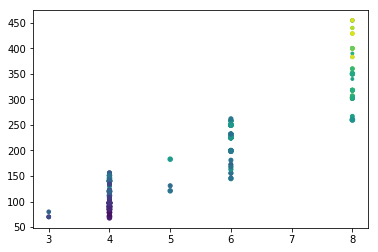

In [313]:
plt.scatter(veh_dataN.cyl,veh_dataN.disp,veh_dataN.acc,veh_dataN.wt)

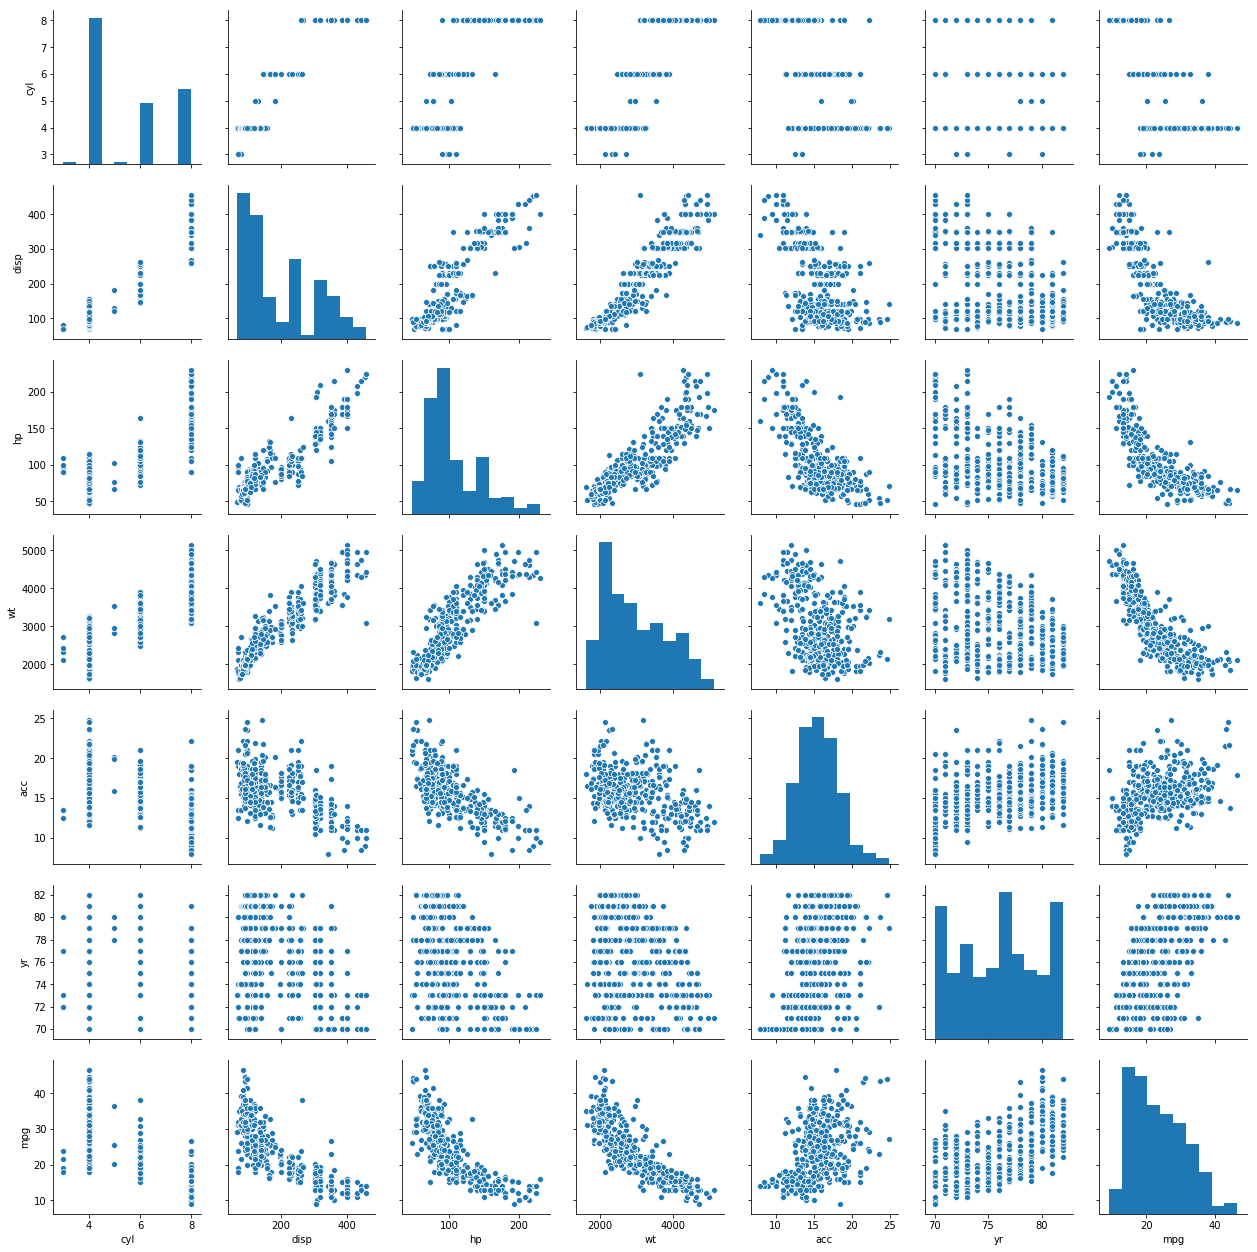

In [314]:
sns.pairplot(veh_dataN)

In [315]:
veh_dataN=veh_dataN.apply(stats.zscore)

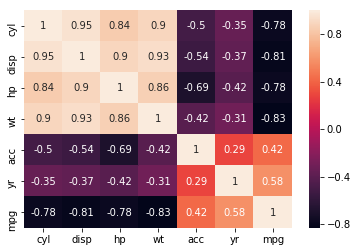

In [316]:
sns.heatmap(veh_dataN.corr(),annot=True)

                                        Using K-Means Technique

In [318]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [319]:
distortions = []

In [320]:
X = pd.DataFrame(veh_dataN)

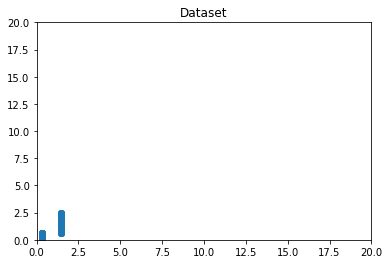

In [321]:
plt.plot()
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.title('Dataset')
plt.scatter(X.cyl,X.disp)
plt.show()

In [322]:
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(
        sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1))**2 / X.shape[0])

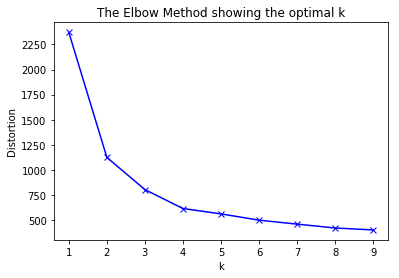

In [323]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [324]:
kmeans = KMeans(n_clusters=4,random_state=101)

In [325]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [326]:
cluster_center = kmeans.cluster_centers_

cluster_center

array([[-0.83170217, -0.79320521, -0.75919461, -0.78782597,  0.38355974,
         1.1127382 ,  1.21012512],
       [ 1.48394702,  1.48913886,  1.50679413,  1.39145217, -1.0759934 ,
        -0.68265368, -1.1566489 ],
       [ 0.41549305,  0.30031222, -0.03530064,  0.34141577,  0.30633818,
         0.06662814, -0.49265912],
       [-0.85814365, -0.80247472, -0.55744679, -0.75309477,  0.3207127 ,
        -0.63048922,  0.2066802 ]])

In [327]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3, 3,
       3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 0, 2,
       2, 2, 2, 3, 0, 3, 3, 3, 1, 3, 2, 2, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 3, 3, 3, 0, 0, 0, 0, 2, 3, 3,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 0, 3, 3, 3, 3, 2, 2, 3, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 1,
       2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,

In [328]:
print(X.shape) 

(392, 7)


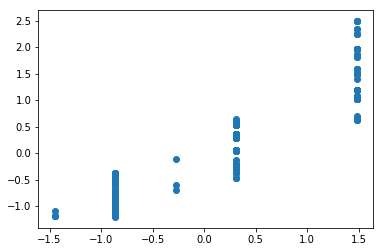

In [329]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])#, X.iloc[:,1],X.iloc[:,2],X.iloc[:3],X.iloc[:4],X.iloc[:5],X.iloc[:,6])
plt.show()

# Use linear regression model on different clusters separately and print the coefficients of the models individually 

In [330]:
veh_dataN.head(5)

,cyl,disp,hp,wt,acc,yr,mpg
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925


In [331]:
veh_dataN['clusters'] = clusters

In [332]:
Kvehdt1 = veh_dataN[veh_dataN.clusters==0]
Kvehdt2 = veh_dataN[veh_dataN.clusters==1]
Kvehdt3 = veh_dataN[veh_dataN.clusters==2]
Kvehdt4 = veh_dataN[veh_dataN.clusters==3]

In [333]:
Kvehdt1.shape

(109, 8)

In [334]:
Kvehdt2.shape

(94, 8)

In [335]:
Kvehdt3.shape

(89, 8)

In [336]:
Kvehdt4.shape

(100, 8)

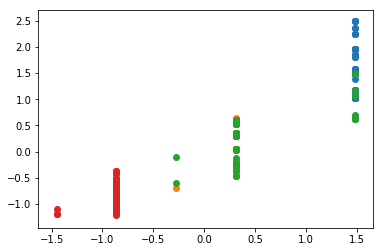

In [337]:
plt.scatter(vehdt1.iloc[:,0], vehdt1.iloc[:,1])
plt.scatter(vehdt2.iloc[:,0], vehdt2.iloc[:,1])
plt.scatter(vehdt3.iloc[:,0], vehdt3.iloc[:,1])
plt.scatter(vehdt4.iloc[:,0], vehdt4.iloc[:,1])
plt.show()

In [338]:
# create X and y
KX1 = Kvehdt1.drop("clusters", axis=1)
KX1 = Kvehdt1.drop("mpg", axis=1)
Ky1 = Kvehdt1["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(KX1, Ky1)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.583987200765234
[ 1.00206734 -0.11463161 -0.47610104 -0.78099867  0.0735283   0.32683901
  0.        ]


In [339]:
# create X and y
KX2 = Kvehdt2.drop("clusters", axis=1)
KX2 = Kvehdt2.drop("mpg", axis=1)
Ky2 = Kvehdt2["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(KX2, Ky2)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-0.13405564473375287
[-0.45554438 -0.07563882 -0.09381686 -0.11975106 -0.18356236  0.18087378
  0.        ]


In [340]:
# create X and y
KX3 = Kvehdt3.drop("clusters", axis=1)
KX3 = Kvehdt3.drop("mpg", axis=1)
Ky3 = Kvehdt3["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(KX3, Ky3)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-0.43181995779543386
[ 0.17474906 -0.01264064 -0.15207958 -0.37951355 -0.06930194  0.23688482
  0.        ]


In [341]:
# create X and y
KX4 = Kvehdt4.drop("clusters", axis=1)
KX4 = Kvehdt4.drop("mpg", axis=1)
Ky4 = Kvehdt4["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(KX4, Ky4)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-0.152196062012872
[ 0.64449483 -0.6285529  -0.20370115 -0.55654254 -0.07493838  0.16035253
  0.        ]


                                      Using Hierarchical Clustering Technique

In [342]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [343]:
Z = linkage(X, 'ward', metric='euclidean')

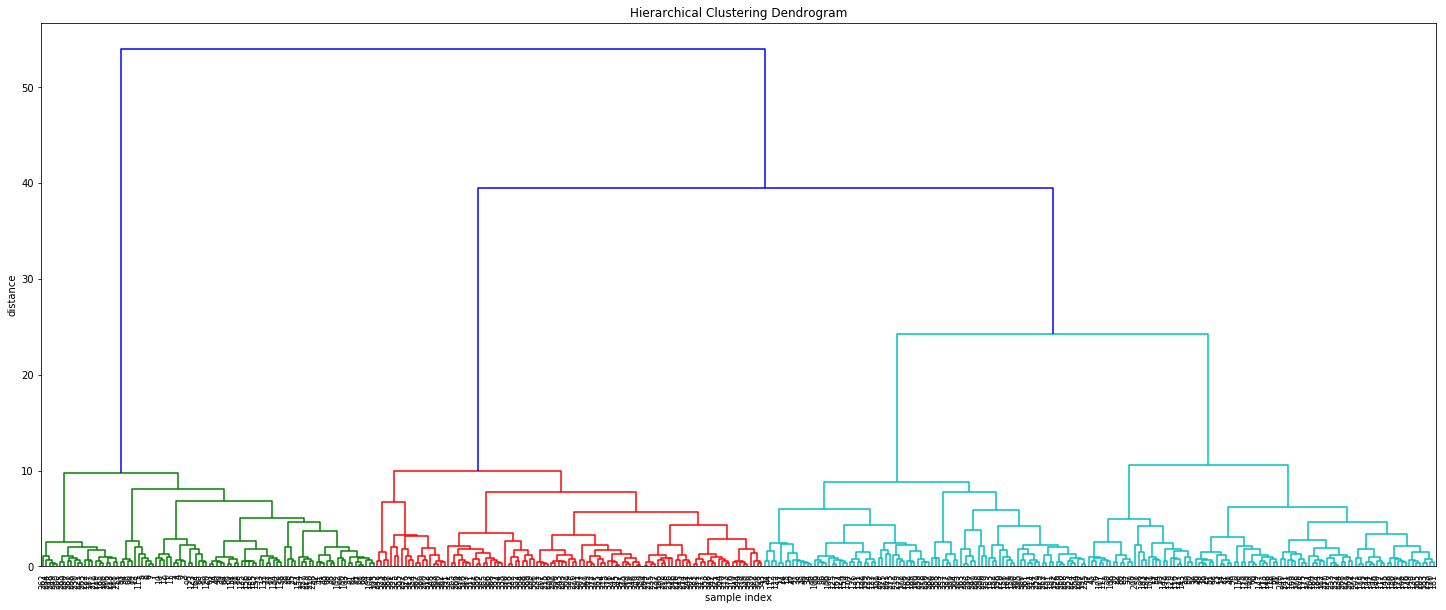

In [344]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

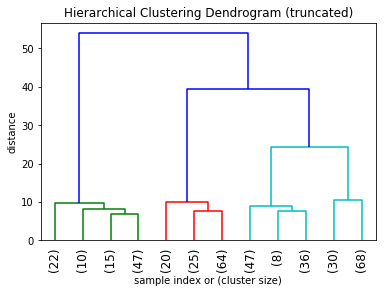

In [345]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.show()

In [346]:
from scipy.cluster.hierarchy import fcluster
max_d = 15
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 3, 1, 1, 1, 1, 4, 4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 1, 1, 1, 1, 3, 4, 4, 4,
       4, 4, 3, 4, 1, 1, 4, 4, 4, 4, 1, 4, 3, 1, 3, 3, 3, 4, 4, 4, 4, 3,
       3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 4, 2, 3,
       3, 3, 3, 4, 2, 4, 4, 4, 1, 4, 3, 3, 1, 1, 1, 1, 2, 2, 2, 4, 2, 1,
       3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 4, 4, 4, 2, 2, 2, 2, 3, 4, 4,
       2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       2, 2, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 3, 3, 1, 1,
       3, 1, 1, 3, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2,

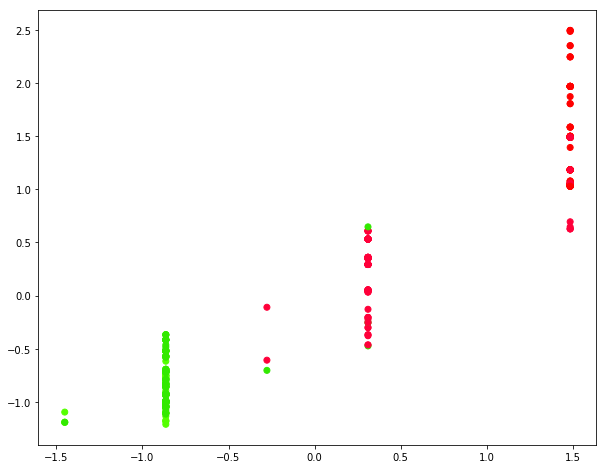

In [348]:
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

# There are 4 optimal number of Clusters observed in data using both k-Means and Hierarchical Clustering techniques

In [349]:
veh_dataN['clusters'] = clusters

In [350]:
veh_dataN.head(5)

,cyl,disp,hp,wt,acc,yr,mpg,clusters
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.698638,1
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-1.083498,1
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.698638,1
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.955212,1
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.826925,1


In [351]:
vehdt1 = veh_dataN[veh_dataN.clusters==1]
vehdt2 = veh_dataN[veh_dataN.clusters==2]
vehdt3 = veh_dataN[veh_dataN.clusters==3]
vehdt4 = veh_dataN[veh_dataN.clusters==4]

In [352]:
vehdt1.shape

(94, 8)

In [353]:
vehdt2.shape

(109, 8)

In [354]:
vehdt3.shape

(91, 8)

In [355]:
vehdt4.shape

(98, 8)

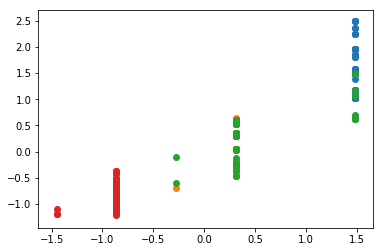

In [356]:
plt.scatter(vehdt1.iloc[:,0], vehdt1.iloc[:,1])
plt.scatter(vehdt2.iloc[:,0], vehdt2.iloc[:,1])
plt.scatter(vehdt3.iloc[:,0], vehdt3.iloc[:,1])
plt.scatter(vehdt4.iloc[:,0], vehdt4.iloc[:,1])
plt.show()

# Use linear regression model on different clusters separately and print the coefficients of the models individually 

In [357]:
# create X and y
X1 = vehdt1.drop("clusters", axis=1)
X1 = vehdt1.drop("mpg", axis=1)
y1 = vehdt1["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1, y1)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-0.13405564473375287
[-0.45554438 -0.07563882 -0.09381686 -0.11975106 -0.18356236  0.18087378
  0.        ]


In [358]:
# create X and y
X2 = vehdt2.drop("clusters", axis=1)
X2 = vehdt2.drop("mpg", axis=1)
y2 = vehdt2["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X2, y2)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.583987200765234
[ 1.00206734 -0.11463161 -0.47610104 -0.78099867  0.0735283   0.32683901
  0.        ]


In [359]:
# create X and y
X3 = vehdt3.drop("clusters", axis=1)
X3 = vehdt3.drop("mpg", axis=1)
y3 = vehdt3["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X3, y3)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

-0.42497926895628024
[ 0.18972347 -0.01854206 -0.15075158 -0.40502637 -0.06191317  0.2260442
  0.        ]


In [360]:
# create X and y
X4 = vehdt4.drop("clusters", axis=1)
X4 = vehdt4.drop("mpg", axis=1)
y4 = vehdt4["mpg"]

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X4, y4)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

0.7560771919828156
[ 1.67155401 -0.66656648 -0.20713824 -0.51076158 -0.10671067  0.13120079
  0.        ]
